In [191]:
from matplotlib import pyplot as plt
import cv2

# Loading Image

Define image path to load.

In [230]:
image_path = '.../meditative_camelia.jpg'

In [231]:
image = cv2.imread(image_path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

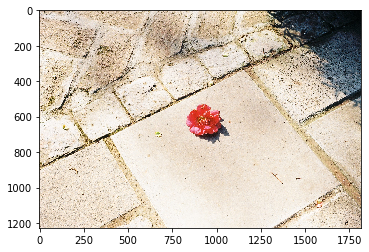

In [232]:
plt.imshow(image)

# Creating Pixel Stats

Set square Pxel size of side x in actual pixels:
***

In [233]:
Pxel = 50

***
This will set the square pixel to Pxel\*Pxel size to compress the actual image.

# Defining variables needed for change

Image stats:

In [234]:
im_height, im_width = image.shape[:2]

Image variables for change with Pxel's from center:

In [235]:
final_height = int(im_height/Pxel)*Pxel
final_width = int(im_width/Pxel)*Pxel

h_diff = im_height - final_height
w_diff = im_width - final_width

h_res_l = int(h_diff/2)
w_res_l = int(w_diff/2)


if h_diff%2 != 0 or h_res_l == 0:
    h_res_r = h_res_l + 1
else:
    h_res_r = h_res_l
    
if w_diff%2 != 0 or w_res_l == 0:
    w_res_r = w_res_l + 1
else:
    w_res_r = w_res_l

# Separating and cutting Image into channels

In [236]:
R = image[h_res_l:-h_res_r, w_res_l:-w_res_r, 0]
G = image[h_res_l:-h_res_r, w_res_l:-w_res_r, 1]
B = image[h_res_l:-h_res_r, w_res_l:-w_res_r, 2]

# Check centered cut image

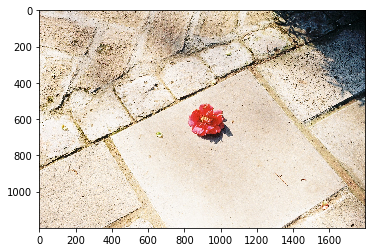

In [237]:
cut_image = cv2.merge((R, G, B))
plt.imshow(cut_image)

# Transform Cut Image

In [238]:
def transform_channel(ch, Pxel):
    
    n_step_col = int(ch.shape[0]/Pxel)
    n_step_row = int(ch.shape[1]/Pxel)
    
    for c in range(n_step_col):
        for r in range(n_step_row):
            
            avg = int(ch[c*Pxel:(c+1)*Pxel, r*Pxel:(r+1)*Pxel].mean())
            
            ch[c*Pxel:(c+1)*Pxel, r*Pxel:(r+1)*Pxel] = avg
            
    return ch

In [239]:
R_t = transform_channel(R, Pxel)
G_t = transform_channel(G, Pxel)
B_t = transform_channel(B, Pxel)

In [240]:
t_image = cv2.merge((R_t, G_t, B_t))

# Check transformed Image

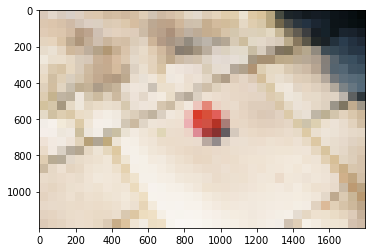

In [241]:
plt.imshow(t_image)

# Save image if you want to

In [242]:
save = 0

In [243]:
ext = image_path.split('.')[-1]

t_image_path = image_path.split('.')[0] + '_2pix_{}.{}'.format(Pxel, ext)

if save == 1:
    
    t_image = cv2.cvtColor(t_image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(t_image_path, t_image)